In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
df = pd.read_csv("covid_19_data.csv")

## Data Cleaning and Pre-Processing

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
#drop unnecessary columns
df = df.drop(['SNo', 'ObservationDate', 'Last Update'], axis=1)

In [6]:
#SUM Confirmed, Deaths, and Recovered values by Country Column
df = df.groupby(['Country/Region']).sum().reset_index()

In [7]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  229 non-null    object 
 1   Confirmed       229 non-null    float64
 2   Deaths          229 non-null    float64
 3   Recovered       229 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.3+ KB


## Exploratory Data Analiysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  229 non-null    object 
 1   Confirmed       229 non-null    float64
 2   Deaths          229 non-null    float64
 3   Recovered       229 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.3+ KB


In [10]:
df.describe()

,Confirmed,Deaths,Recovered
count,2.290000e+02,2.290000e+02,2.290000e+02
mean,1.146378e+08,2.724948e+06,6.746829e+07
std,4.992496e+08,1.087101e+07,2.634108e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.644640e+05,4.305000e+03,2.626010e+05
50%,6.148539e+06,9.060000e+04,3.797948e+06
75%,5.016817e+07,8.344640e+05,3.710158e+07
max,6.049146e+09,1.233038e+08,2.900590e+09


In [11]:
df.describe(include='O')

,Country/Region
count,229
unique,229
top,Azerbaijan
freq,1


In [13]:
col_str = ['Country/Region']
for i in col_str:
  print('Unique value from column "{a}" is :'.format(a=i))
  print(df[i].unique())
  print('total : {}'.format(len(df[i].unique())))
  print('')

Unique value from column "Country/Region" is :
[' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic'
 'East Timor' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faroe Islands' 'Fiji'
 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia' 'Gambia, The'
 'Georgia' 'Germ

c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\laode\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments 

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

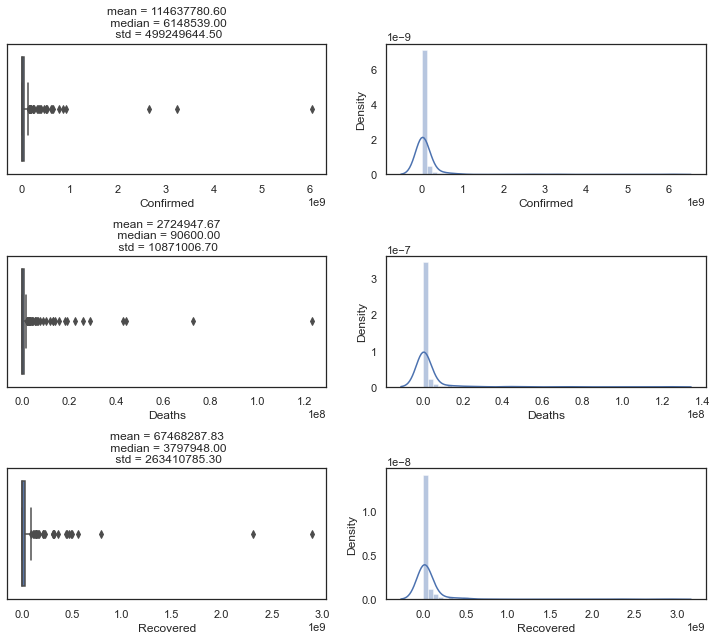

In [14]:
sns.set(style='white')
  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
   
numeric_column = ['Confirmed','Deaths', 'Recovered']
observasi_num(numeric_column)

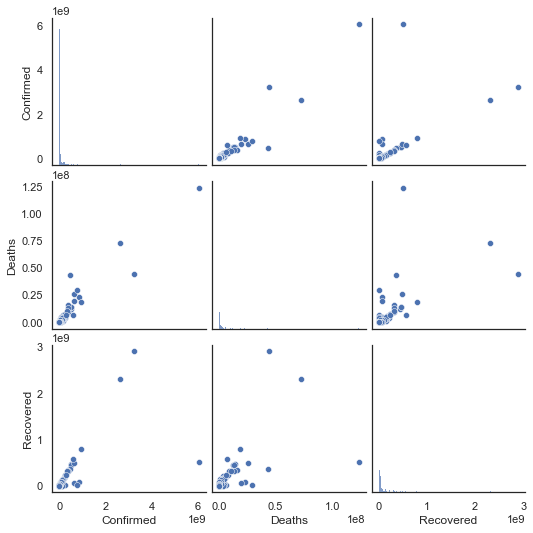

In [15]:
sns.pairplot(df)

## Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Confirmed','Deaths', 'Recovered']

# Statistics before scaling
print('Statistics before scaling')
print(df[numeric_columns].describe())
print('\n')
# Scalling
df_scalled = MinMaxScaler().fit_transform(df[numeric_columns])

# create dataframe
df_scalled = pd.DataFrame(data=df_scalled, index=df.index, columns=df[numeric_columns].columns)

# Sample data content and summary statistics
print('Scaling result example')
print(df_scalled.head())
print('\n')

print('Statistics after scaling')
print(df_scalled.describe())

Statistics before scaling
          Confirmed        Deaths     Recovered
count  2.290000e+02  2.290000e+02  2.290000e+02
mean   1.146378e+08  2.724948e+06  6.746829e+07
std    4.992496e+08  1.087101e+07  2.634108e+08
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.644640e+05  4.305000e+03  2.626010e+05
50%    6.148539e+06  9.060000e+04  3.797948e+06
75%    5.016817e+07  8.344640e+05  3.710158e+07
max    6.049146e+09  1.233038e+08  2.900590e+09


Scaling result example
      Confirmed    Deaths  Recovered
0  1.653126e-10  0.000000   0.000000
1  3.306252e-10  0.000000   0.000000
2  2.814685e-03  0.005426   0.004642
3  3.268043e-03  0.003049   0.004808
4  4.576573e-03  0.006768   0.006536


Statistics after scaling
        Confirmed      Deaths   Recovered
count  229.000000  229.000000  229.000000
mean     0.018951    0.022099    0.023260
std      0.082532    0.088164    0.090813
min      0.000000    0.000000    0.000000
25%      0.000060    0.000035    0.000091
50%      0.00101

## Modeling

In [19]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

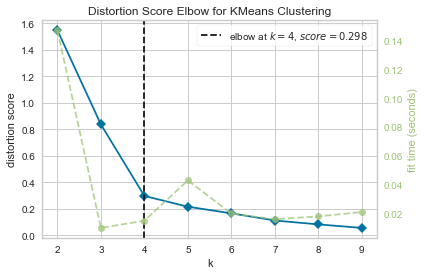

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
#Find number of K optimal using elbow method
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(df_scalled[['Confirmed','Deaths', 'Recovered']])
visualizer.show() 

For 2 clusters, inersia value = 1.5479504341649066
For 3 clusters, inersia value = 0.8371546163126469
For 4 clusters, inersia value = 0.29768874774097526
For 5 clusters, inersia value = 0.21602656766597267
For 6 clusters, inersia value = 0.16371251911602577
For 7 clusters, inersia value = 0.11259967214655138
For 8 clusters, inersia value = 0.08289919095259354
For 9 clusters, inersia value = 0.05706839002396794
For 2 clusters, silhouette score = 0.9561283458663334
For 3 clusters, silhouette score = 0.9542139646510039
For 4 clusters, silhouette score = 0.8738259082028882
For 5 clusters, silhouette score = 0.864700624504498
For 6 clusters, silhouette score = 0.7916070313723216
For 7 clusters, silhouette score = 0.7572740058068872
For 8 clusters, silhouette score = 0.7594369782927054
For 9 clusters, silhouette score = 0.773169813507773


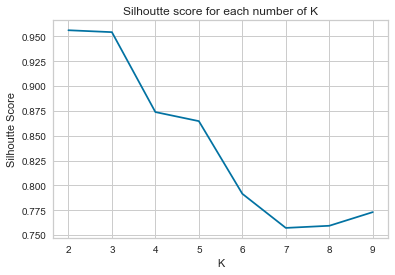

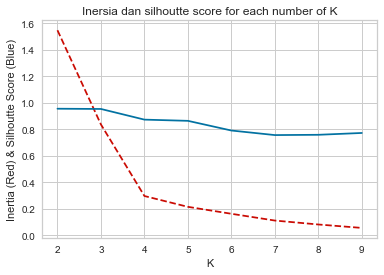

In [22]:
#See inertia value for each number of K
inertia = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scalled[['Confirmed','Deaths', 'Recovered']])
    inertia.append(km.inertia_)
    print("For {} clusters, inersia value = {}".format(k, km.inertia_))
    
print("========================================")

#See silhoutte score for each number of K
from sklearn.metrics import silhouette_samples, silhouette_score
sh_list_mea = []
k_rng = range(2,10)
for num_clusters in k_rng:
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(df_scalled[['Confirmed','Deaths', 'Recovered']].values)
   
    score = silhouette_score(df_scalled[['Confirmed','Deaths', 'Recovered']].values, cluster_labels)
    sh_list_mea.append(score)
    print("For {} clusters, silhouette score = {}".format(num_clusters, score))
    
plt.title("Silhoutte score for each number of K")
plt.xlabel('K')
plt.ylabel('Silhoutte Score')
plt.plot(k_rng,sh_list_mea)
plt.show()

plt.title("Inersia dan silhoutte score for each number of K")
plt.xlabel('K')
plt.ylabel('Inertia (Red) & Silhoutte Score (Blue)')
plt.plot(k_rng,inertia, color = 'r', linestyle = 'dashed')
plt.plot(k_rng,sh_list_mea, color = 'b')
plt.show()

So, based on the elbow method, i chooses a value of 4 for the number of clusters with a silhouette score = 0.873825908028882

In [23]:
#Create models for predict the cluster and arrays to store cluster predictions for each country
km = KMeans(n_clusters=4, random_state = 42)
y_predicted = km.fit_predict(df_scalled[['Confirmed','Deaths', 'Recovered']])
#Add 1 to each cluster value, because the cluster starts from 0
y_predicted = y_predicted + 1
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
#Added column 'Cluster' to df dataframe of predicted cluster value
df_kmeans = df.copy()
df_kmeans['Cluster']=y_predicted
#Change the data type of cluster column to object
df_kmeans['Cluster'] = df_kmeans['Cluster'].astype('str')
df_kmeans.head()

,Country/Region,Confirmed,Deaths,Recovered,Cluster
0,Azerbaijan,1.0,0.0,0.0,2
1,"('St. Martin',)",2.0,0.0,0.0,2
2,Afghanistan,17026442.0,669075.0,13464399.0,2
3,Albania,19768869.0,375955.0,13945256.0,2
4,Algeria,27684358.0,834464.0,18959299.0,2


In [25]:
#Visualizing clustering results
import plotly.express as px
fig = px.scatter_3d(df_kmeans, x='Confirmed', y='Deaths', z='Recovered', color='Cluster')

fig.show()

In [26]:
df_out_means = df_kmeans.groupby(by = 'Cluster').sum()[['Confirmed','Deaths', 'Recovered']].reset_index()
df_out_means

,Cluster,Confirmed,Deaths,Recovered
0,1,7.967701e+09,252768244.0,4.968624e+09
1,2,6.354849e+09,130891678.0,4.763976e+09
2,3,5.880356e+09,117049333.0,5.214267e+09
3,4,6.049146e+09,123303762.0,5.033710e+08


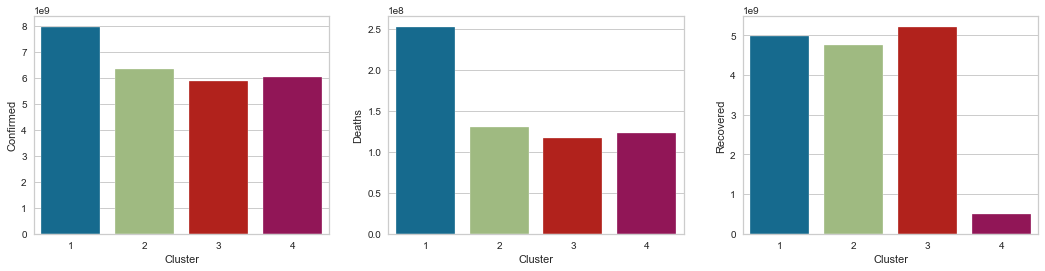

In [27]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'Cluster',y = 'Confirmed', data = df_out_means)
plt.subplot(1,3,2)
sns.barplot(x= 'Cluster',y = 'Deaths', data = df_out_means)
plt.subplot(1,3,3)
sns.barplot(x= 'Cluster',y = 'Recovered', data = df_out_means)
plt.show()